import dataset

In [2]:
import pandas as pd 

housing_advert = pd.read_csv('housing-Raoofi.csv')

C:\Users\M7600QE\AppData\Local\Temp\ipykernel_9776\2671681662.py:3: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  housing_advert = pd.read_csv('housing-Raoofi.csv')


data preprocessing

In [3]:
housing_advert.sample(5)

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
3967,105,1401,2,True,True,True,۸ ساعت پیش در تهران، نیاوران,۲۳٬۰۰۰٬۰۰۰٬۰۰۰ تومان
8837,52,1401,1,True,False,True,۸ ساعت پیش در تهران، استاد معین,۲٬۷۰۰٬۰۰۰٬۰۰۰ تومان
42344,42,1397,1,True,True,False,۴ روز پیش در تهران، شوش,۱٬۵۰۰٬۰۰۰٬۰۰۰ تومان
57217,62,1385,2,False,False,True,۱ هفته پیش در تهران، باغ فیض,۴٬۶۵۰٬۰۰۰٬۰۰۰ تومان
35077,135,1401,3,True,True,True,۴ روز پیش در تهران، تهرانپارس غربی,۱۷٬۰۰۰٬۰۰۰٬۰۰۰ تومان


In [4]:
housing_advert.shape

(94036, 8)

In [5]:
housing_advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94036 entries, 0 to 94035
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Area          94036 non-null  object
 1   Construction  94036 non-null  object
 2   Room          94036 non-null  object
 3   Warehouse     94036 non-null  object
 4   Parking       94036 non-null  object
 5   Elevator      94036 non-null  object
 6   Address       94036 non-null  object
 7   Price         94036 non-null  object
dtypes: object(8)
memory usage: 5.7+ MB


In [6]:
df = housing_advert.copy()

In [7]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Construction'] = pd.to_numeric(df['Construction'], errors='coerce')
df['Room'] = pd.to_numeric(df['Room'], errors='coerce')

In [8]:
df['Warehouse'] = df['Warehouse'].astype(bool)
df['Parking'] = df['Parking'].astype(bool)
df['Elevator'] = df['Elevator'].astype(bool)

In [9]:
import re
def clean_address(address):
    match = re.search(r'پیش در تهران، ([^،]+)', address)
    if match:
        return match.group(1)
    return address

In [10]:
df['Address'] =  df['Address'].apply(clean_address)

In [11]:
def clean_price(price):
    cleaned_price = re.sub(r'[^\d]', '', price)
    return int(cleaned_price) if cleaned_price else None

In [12]:
df['Price'] = df['Price'].apply(clean_price)

In [13]:
df.isna().sum()

Area              1
Construction      1
Room              1
Warehouse         0
Parking           0
Elevator          0
Address           0
Price           246
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.describe()

,Area,Construction,Room,Price
count,93790.000000,93790.000000,93790.000000,9.379000e+04
mean,125.018083,1392.983463,2.225301,1.452574e+10
std,267.611046,7.745195,0.765839,2.737502e+10
min,1.000000,1371.000000,1.000000,2.300000e+08
25%,74.000000,1386.000000,2.000000,4.900000e+09
50%,105.000000,1395.000000,2.000000,8.580000e+09
75%,141.000000,1401.000000,3.000000,1.550000e+10
max,36500.000000,1401.000000,4.000000,1.000000e+12


In [16]:
df['AddressCode'], unique_addresses = pd.factorize(df['Address'])

In [17]:
df[['Parking','Warehouse','Elevator']] = df[['Parking','Warehouse','Elevator']].astype(int)

thanks mohamadreza zaheri for this plot

https://www.kaggle.com/code/mohamadrezazaheri/divar-house-price

In [55]:
ads_per_neighborhood = df['Address'].value_counts().reset_index()
ads_per_neighborhood.columns = ['Neighborhood', 'Ads_Count']

In [56]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="tehran_ads_map")
ads_per_neighborhood['Coordinates'] = ads_per_neighborhood['Neighborhood'].apply(
    lambda x: geolocator.geocode(f"تهران, {x}", timeout=10) if pd.notnull(x) else None)
ads_per_neighborhood['Latitude'] = ads_per_neighborhood['Coordinates'].apply(lambda x: x.latitude if x else None)
ads_per_neighborhood['Longitude'] = ads_per_neighborhood['Coordinates'].apply(lambda x: x.longitude if x else None)

In [58]:
import folium

tehran_map = folium.Map(location=[35.6892, 51.3890], zoom_start=12 )
for idx, row in ads_per_neighborhood.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Ads_Count'] * 0.005, color='darkblue',fill=True,fill_color='darkred',fill_opacity=0.6,
            popup=f"محله: {row['Neighborhood']}, تعداد آگهی‌ها: {row['Ads_Count']}"
        ).add_to(tehran_map)

display(tehran_map)

In [42]:
cdf = df[['Area', 'Construction', 'Room', 'Warehouse', 'Parking', 'Elevator','AddressCode', 'Price']].copy()

Remove outliers

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

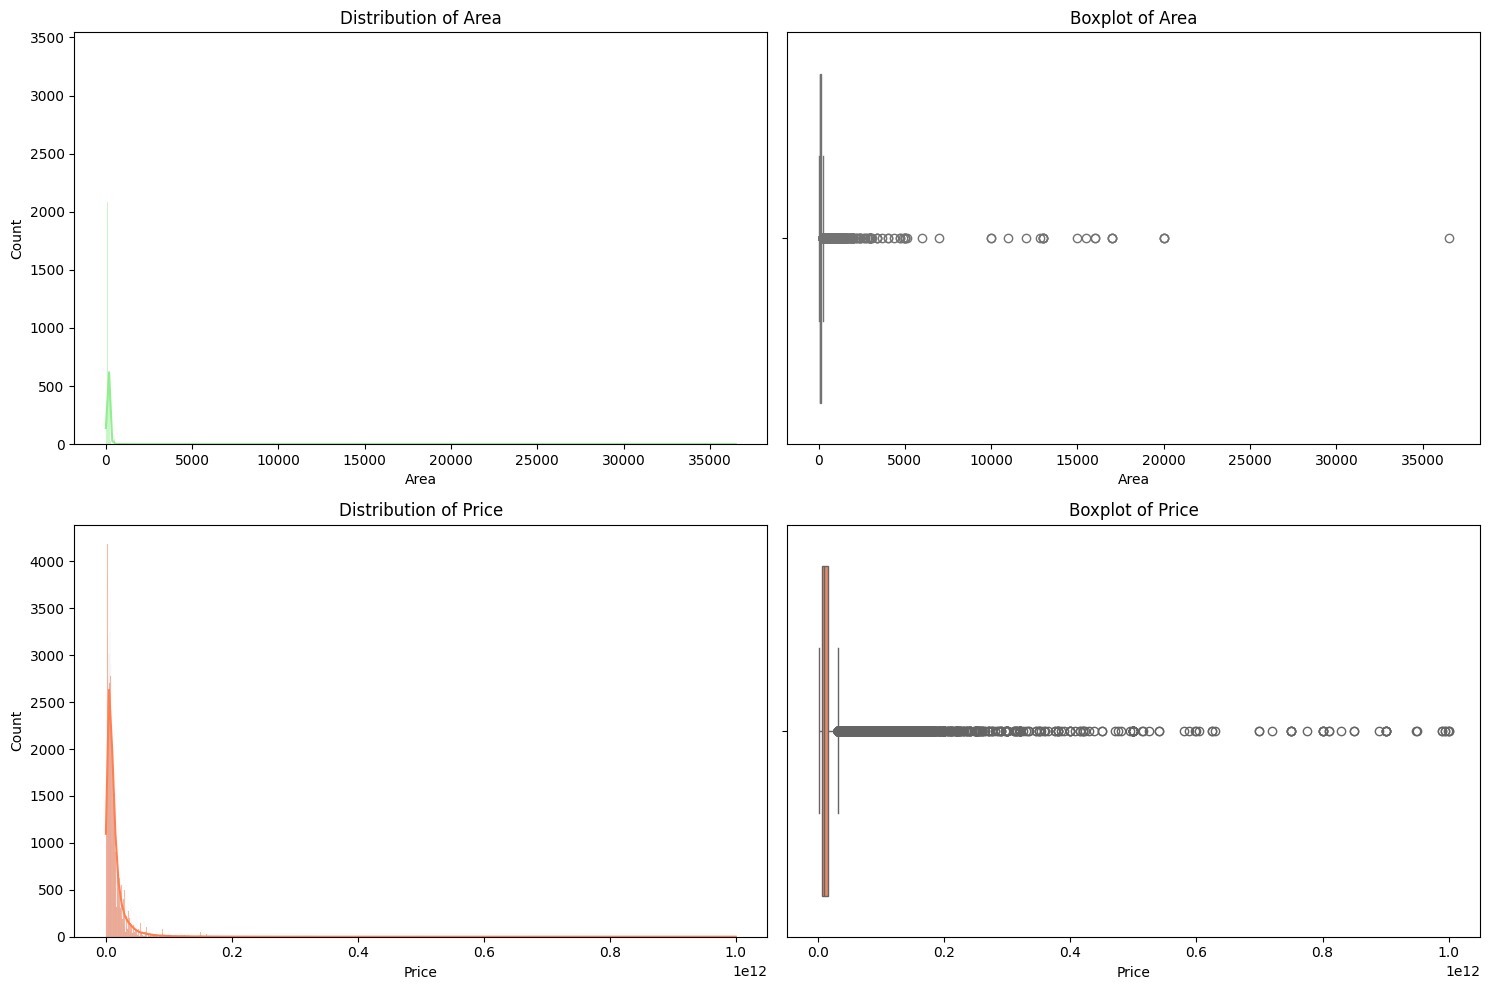

In [44]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(cdf['Area'], kde=True, color='lightgreen')
plt.title('Distribution of Area')

plt.subplot(2, 2, 2)
sns.boxplot(x=cdf['Area'], color='lightgreen')
plt.title('Boxplot of Area')

plt.subplot(2, 2, 3)
sns.histplot(cdf['Price'], kde=True, color='coral')
plt.title('Distribution of Price')

plt.subplot(2, 2, 4)
sns.boxplot(x=cdf['Price'], color='coral')
plt.title('Boxplot of Price')

plt.tight_layout()
plt.show()

In [45]:
lower_limit_price = cdf['Price'].quantile(0.04)
upper_limit_price = cdf['Price'].quantile(0.96)

cdf = cdf[(cdf['Price'] >= lower_limit_price) & (cdf['Price'] <= upper_limit_price)]

lower_limit_area = cdf['Area'].quantile(0.04)
upper_limit_area = cdf['Area'].quantile(0.96)

cdf = cdf[(cdf['Area'] >= lower_limit_area) & (cdf['Area'] <= upper_limit_area)]

In [46]:
Q1_price = cdf['Price'].quantile(0.2)
Q3_price = cdf['Price'].quantile(0.8)
IQR_price = Q3_price - Q1_price

cdf = cdf[~((cdf['Price'] < (Q1_price - 1.5 * IQR_price)) | (cdf['Price'] > (Q3_price + 1.5 * IQR_price)))]

Q1_area = cdf['Area'].quantile(0.2)
Q3_area = cdf['Area'].quantile(0.8)
IQR_area = Q3_area - Q1_area

cdf = cdf[~((cdf['Area'] < (Q1_area - 1.5 * IQR_area)) | (cdf['Area'] > (Q3_area + 1.5 * IQR_area)))]

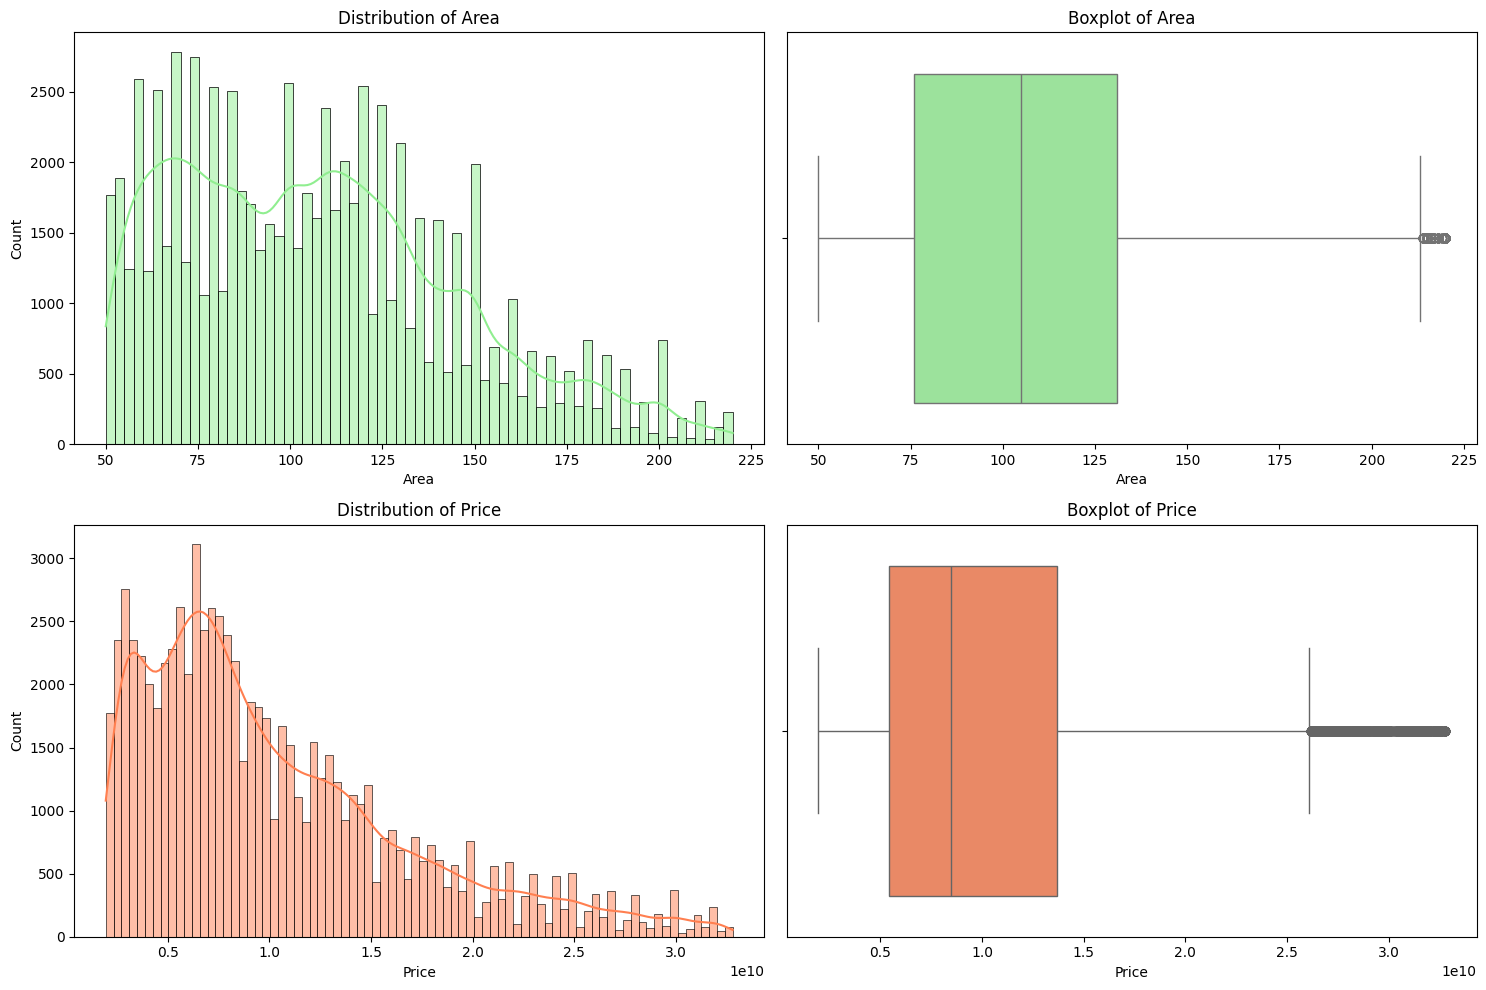

In [47]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(cdf['Area'], kde=True, color='lightgreen')
plt.title('Distribution of Area')

plt.subplot(2, 2, 2)
sns.boxplot(x=cdf['Area'], color='lightgreen')
plt.title('Boxplot of Area')

plt.subplot(2, 2, 3)
sns.histplot(cdf['Price'], kde=True, color='coral')
plt.title('Distribution of Price')

plt.subplot(2, 2, 4)
sns.boxplot(x=cdf['Price'], color='coral')
plt.title('Boxplot of Price')

plt.tight_layout()
plt.show()

Finding the most important parameters for the model

In [48]:
corr = cdf.corr()

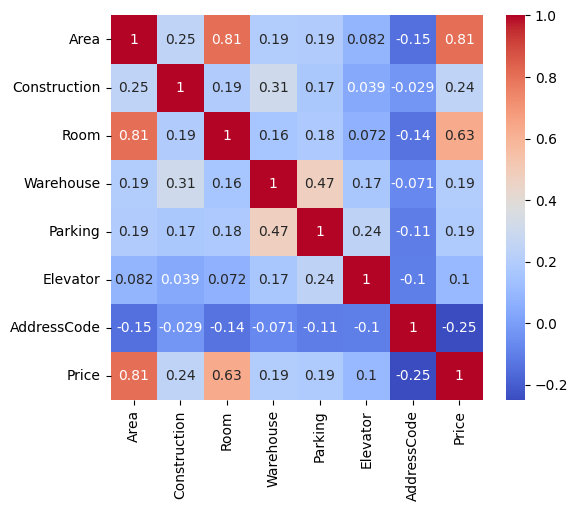

In [49]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.show()

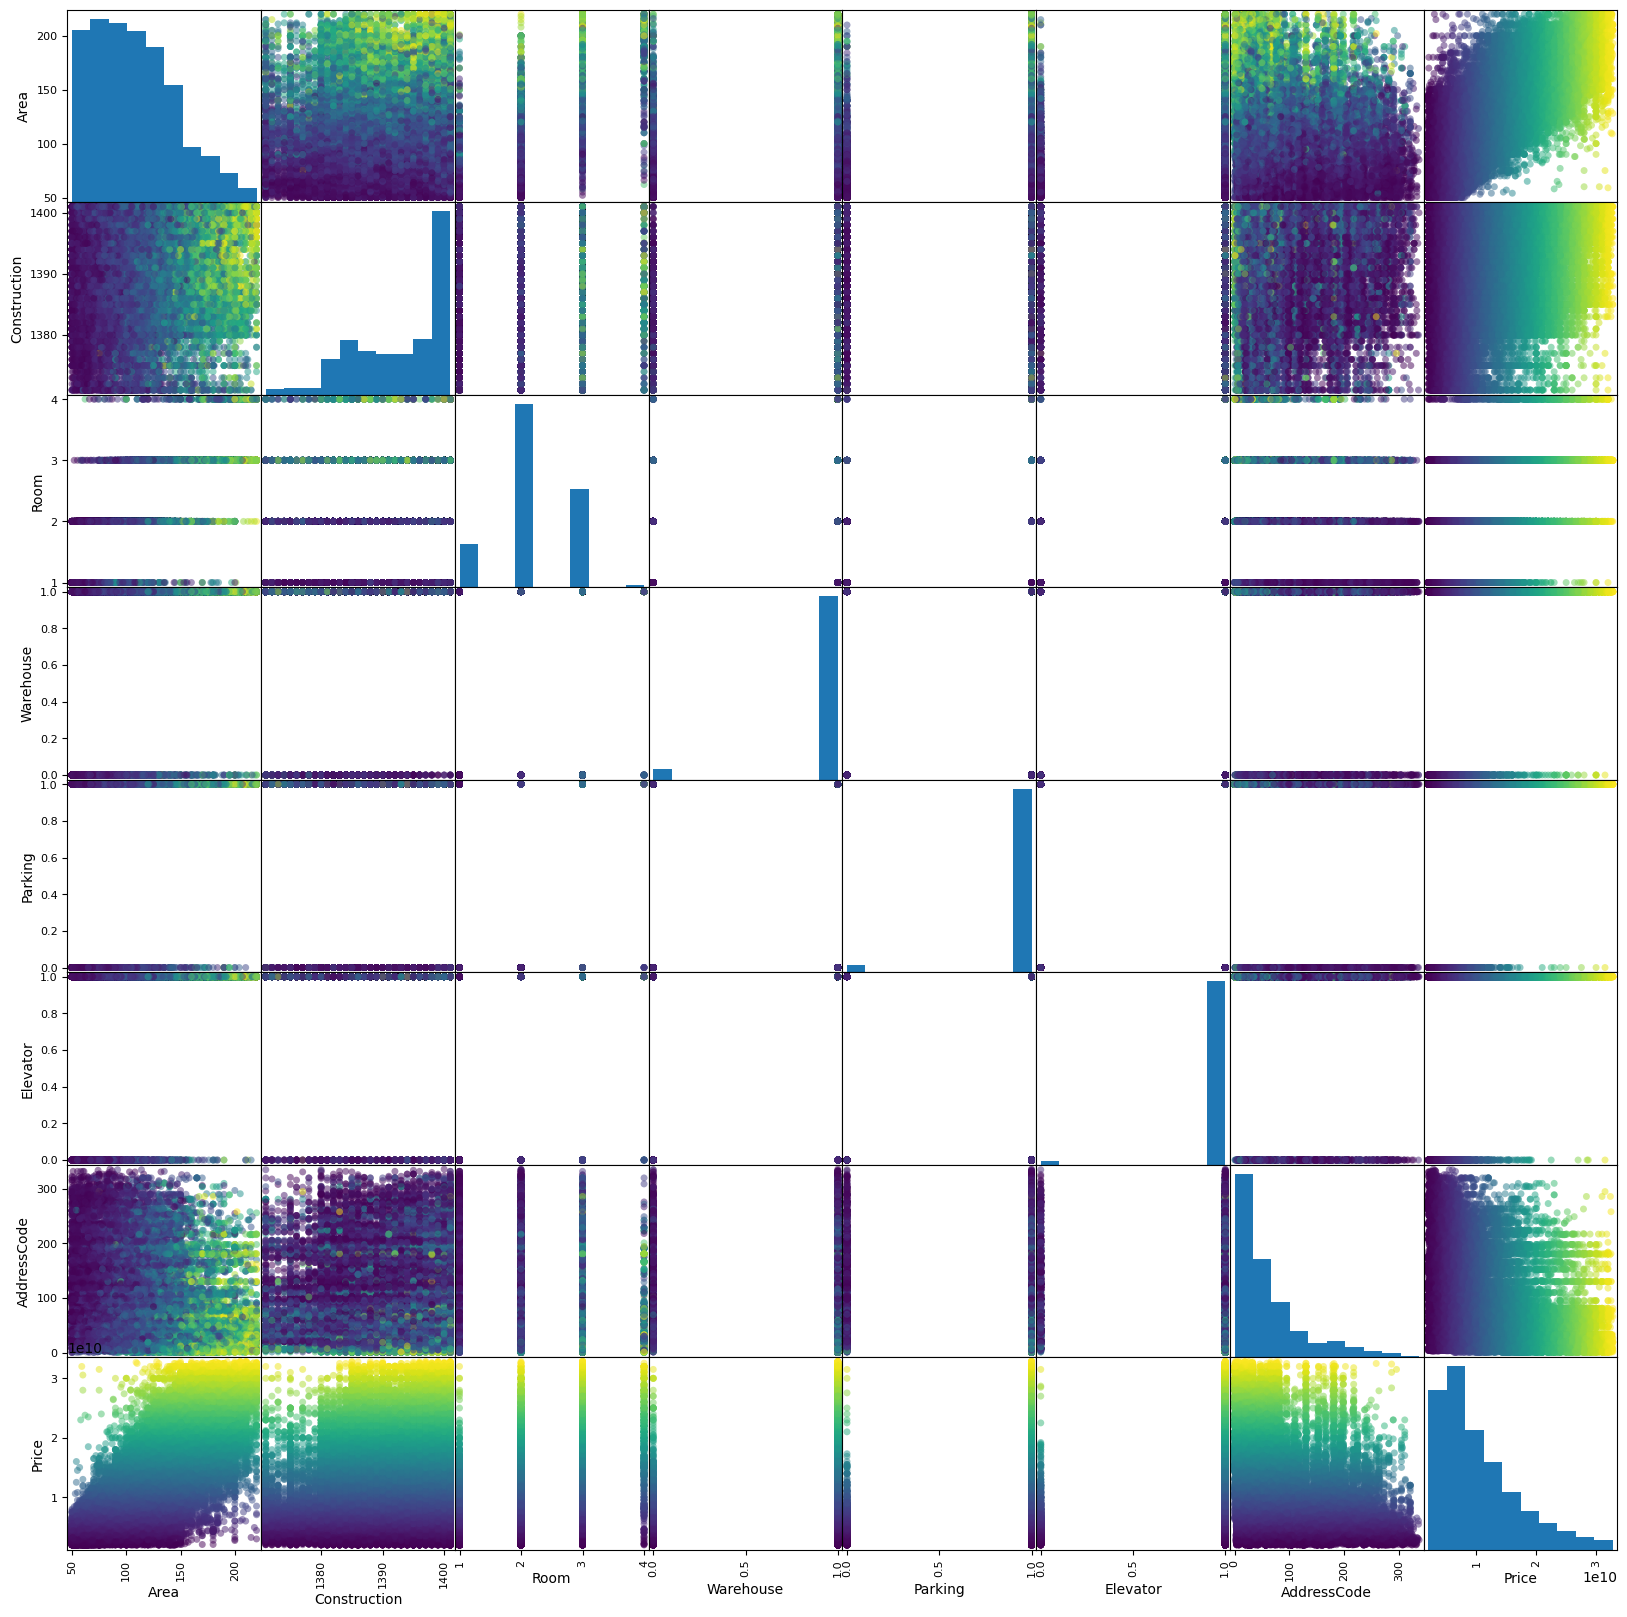

In [50]:
pd.plotting.scatter_matrix(cdf, c=cdf.Price, figsize=[20, 20], s=100)
plt.show()

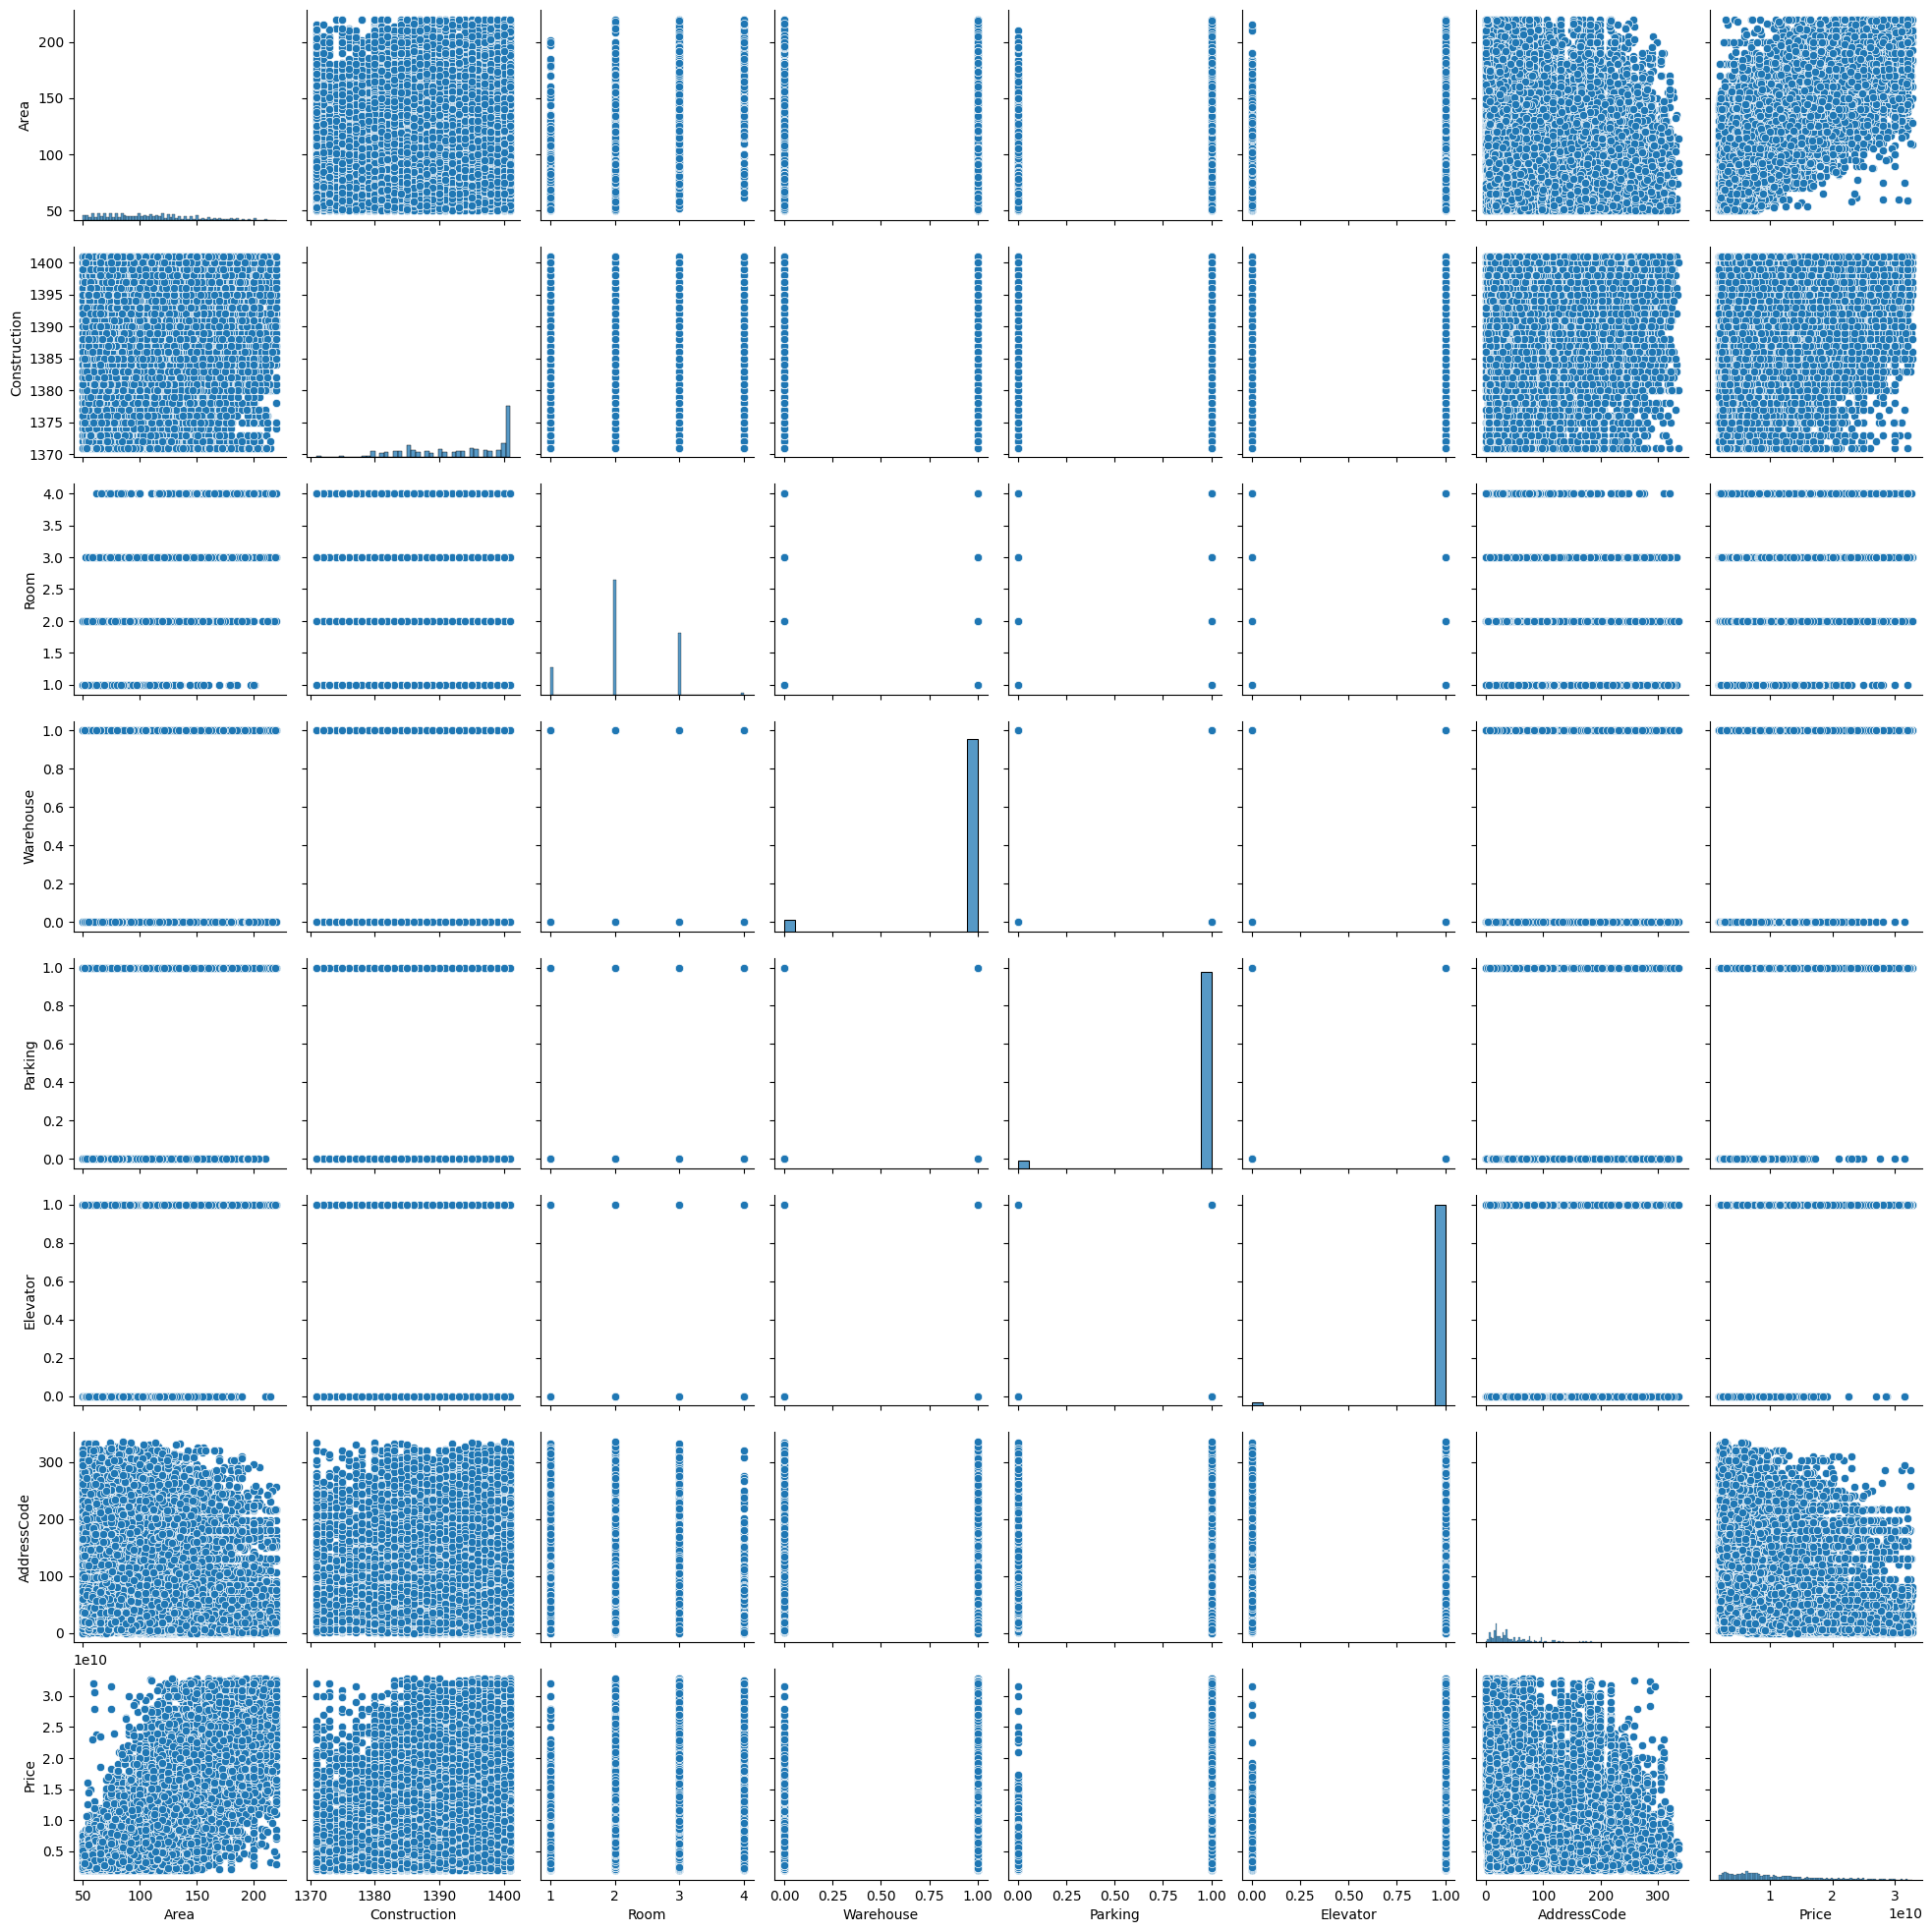

In [51]:
sns.pairplot(cdf)
plt.show()

MACHINE LEARNING MODEL

In [58]:
X = cdf[['Area', 'Construction', 'Room','AddressCode']]
y = cdf[['Price']]

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X_scaled , y , random_state=42 , test_size=0.2)

RF

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_features='log2', min_samples_split=10,
                      n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features='log2', min_samples_split=10,
                      n_estimators=200, random_state=42)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = rf_model.predict(x_test)
print('R² Score:', r2_score(y_test, y_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))

R² Score: 0.8757953123191068
Mean Squared Error: 5.515972035063545e+18
